# Proyecto análisis de comportamiento de clientes de Megaline

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
import pandas as pd # Cargar todas las librerías
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

## Cargar datos

In [9]:
megaline_calls= pd.read_csv("./megaline_calls.csv")# Carga los archivos de datos en diferentes DataFrames
megaline_internet= pd.read_csv("./megaline_internet.csv")
megaline_messages=pd.read_csv("./megaline_messages.csv")
megaline_plans=pd.read_csv("./megaline_plans.csv")
megaline_users=pd.read_csv("./megaline_users.csv")


## Preparar los datos

## Tarifas

In [10]:
megaline_plans.info()# Imprime la información general/resumida sobre el DataFrame de las tarifas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [11]:
megaline_plans.head()# Imprime una muestra de los datos para las tarifas


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


No se observan problemas en los datos, ni datos ausentes. 

## Enriquecer los datos

In [12]:
megaline_plans["gb_per_month_included"]=megaline_plans["mb_per_month_included"]/1024

## Usuarios/as

In [13]:
megaline_users.info()# Imprime la información general/resumida sobre el DataFrame de usuarios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
megaline_users.head()# Imprime una muestra de datos para usuarios


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [15]:
megaline_users.duplicated().sum()


0

Al llamar al método describe(), se puede notar que el dataframe contiene los datos de 500 usuarios y la edad promedio de estos es de 45 años. Por otra parte, no se observan datos duplicados. Sin embargo, se puede ver que existen datos ausentes en la columna churn date. Estos tendrían que ser reemplazados por otro valor, ya que, si se eliminan, se podría alterar el análisis posterior. Además la columna reg_date debería estar en formato de fecha datetime en caso se necesite hacer un análisis con esos datos.

### Corregir los datos

In [16]:
megaline_users["churn_date"].fillna("in use",inplace=True)
megaline_users["user_id"]=megaline_users["user_id"].astype("object")

megaline_users["reg_date"]=pd.to_datetime(megaline_users["reg_date"])
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.4+ KB


C:\Users\steph\AppData\Local\Temp\ipykernel_8876\2517996380.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  megaline_users["churn_date"].fillna("in use",inplace=True)


## Llamadas

In [17]:
megaline_calls.info()# Imprime la información general/resumida sobre el DataFrame de las llamadas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [18]:
print(megaline_calls.head())# Imprime una muestra de datos para las llamadas

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


In [19]:
megaline_calls.duplicated().sum()

0

In [20]:
megaline_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


El tipo de datos de la columna user_id está como entero, pero sería mejor que sea de tipo object ya que no se pueden hacer cálculos con los números de usuario.Igualmente, la columna call_date debería tener formato de fecha. Por otro lado, no se observan datos duplicados ni ausentes y al usar el método describe() se puede notar que la duración promedio de las llamadas individuales es de 6,7 minutos. Sin embargo, debido a que la empresa redondea la duración de las llamadas de segundos a minutos sería bueno redondear la duración de cada llamada. 

### Corregir los datos

In [21]:
megaline_calls["user_id"]=megaline_calls["user_id"].astype("object")

megaline_calls["call_date"]=pd.to_datetime(megaline_calls["call_date"])
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


### Enriquecer los datos

In [22]:
megaline_calls["month"]=megaline_calls["call_date"].dt.month

megaline_calls["duration"]=np.ceil(megaline_calls["duration"])
print(megaline_calls.head())

         id user_id  call_date  duration  month
0   1000_93    1000 2018-12-27       9.0     12
1  1000_145    1000 2018-12-27      14.0     12
2  1000_247    1000 2018-12-27      15.0     12
3  1000_309    1000 2018-12-28       6.0     12
4  1000_380    1000 2018-12-30       5.0     12


## Mensajes

In [23]:
megaline_messages.info()# Imprime la información general/resumida sobre el DataFrame de los mensajes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


El tipo de datos de la columna user_id está como entero, pero sería mejor que sea de tipo object ya que no se pueden hacer cálculos con los números de usuario. Asimismo, la columna message_date debería ser del tipo datetime. Finalmente, no se observan datos ausentes ni duplicados.

### Corregir los datos

In [24]:
megaline_messages["user_id"]=megaline_messages["user_id"].astype("object")
megaline_messages["message_date"]=pd.to_datetime(megaline_messages["message_date"])

megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Enriquecer los datos

In [25]:
megaline_messages["month"]=megaline_messages["message_date"].dt.month

## Internet

In [26]:
megaline_internet.info()# Imprime la información general/resumida sobre el DataFrame de internet


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [27]:
print(megaline_internet.head())# Imprime una muestra de datos para el tráfico de internet

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


In [28]:
megaline_internet.duplicated().sum()

0

In [29]:
megaline_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


El tipo de datos de la columna user_id está como entero, pero sería mejor que sea de tipo object ya que no se pueden hacer cálculos con los números de usuario. Igualmente, la columna session_date debería ser de tipo datetime y sería bueno crear una columna que extraiga el mes en el que ocurrió cada sesión. Finalmente, el método describe() permite ver que el consumo promedio de internet en cada sesión, es de 366 megabytes. Sin embargo, sería mejor convertir el consumo a gb, ya que la empresa calcula el cobro extra de internet por gb.

### Corregir los datos

In [30]:
megaline_internet["user_id"]=megaline_internet["user_id"].astype("object")
megaline_internet["session_date"]=pd.to_datetime(megaline_internet["session_date"])

### Enriquecer los datos

In [31]:
megaline_internet["month"]=megaline_internet["session_date"].dt.month
megaline_internet.head()

megaline_internet["gb_used"]=megaline_internet["mb_used"]/1024
megaline_internet.head()

,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590


## Estudiar las condiciones de las tarifas

In [32]:
megaline_plans.head()# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario

In [33]:
# Calcula el número de llamadas hechas por cada usuario al mes. 


grp_calls_per_user= megaline_calls.groupby(by=["user_id","month"])["id"].count()
calls_per_user=grp_calls_per_user.reset_index()
print(calls_per_user)

      user_id  month  id
0        1000     12  16
1        1001      8  27
2        1001      9  49
3        1001     10  65
4        1001     11  64
...       ...    ...  ..
2253     1498     12  39
2254     1499      9  41
2255     1499     10  53
2256     1499     11  45
2257     1499     12  65

[2258 rows x 3 columns]


In [34]:
grp_min_calls=megaline_calls.groupby(by=["user_id","month"])["duration"].sum()# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
min_per_user=grp_min_calls.reset_index()
print(min_per_user)


      user_id  month  duration
0        1000     12     124.0
1        1001      8     182.0
2        1001      9     315.0
3        1001     10     393.0
4        1001     11     426.0
...       ...    ...       ...
2253     1498     12     339.0
2254     1499      9     346.0
2255     1499     10     385.0
2256     1499     11     308.0
2257     1499     12     496.0

[2258 rows x 3 columns]


In [35]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

grp_internet=megaline_internet.groupby(by=["user_id","month"])["gb_used"].sum()
mb_used_per_user= grp_internet.reset_index()
print(mb_used_per_user)


      user_id  month    gb_used
0        1000     12   1.856904
1        1001      8   6.756982
2        1001      9  13.002754
3        1001     10  21.807119
4        1001     11  18.070605
...       ...    ...        ...
2272     1498     12  22.595400
2273     1499      9  12.680430
2274     1499     10  19.035576
2275     1499     11  16.419756
2276     1499     12  21.542197

[2277 rows x 3 columns]


In [37]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

grp_messages=megaline_messages.groupby(by=["user_id","month"])["id"].count()
msgs_per_user=grp_messages.reset_index()
print(msgs_per_user)

      user_id  month  id
0        1000     12  11
1        1001      8  30
2        1001      9  44
3        1001     10  53
4        1001     11  36
...       ...    ...  ..
1801     1496      9  21
1802     1496     10  18
1803     1496     11  13
1804     1496     12  11
1805     1497     12  50

[1806 rows x 3 columns]


In [38]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
mrg_call=calls_per_user.merge(min_per_user,on=["user_id","month"],how="outer")
mrg_messages=mrg_call.merge(msgs_per_user,on=["user_id","month"],how="outer")
data_per_user=mrg_messages.merge(mb_used_per_user,on=["user_id","month"],how="outer")
data_per_user.columns=["user_id","month","n_calls","minutes","n_messages","gb_used"]
print(data_per_user)

      user_id  month  n_calls  minutes  n_messages    gb_used
0        1000     12     16.0    124.0        11.0   1.856904
1        1001      8     27.0    182.0        30.0   6.756982
2        1001      9     49.0    315.0        44.0  13.002754
3        1001     10     65.0    393.0        53.0  21.807119
4        1001     11     64.0    426.0        36.0  18.070605
...       ...    ...      ...      ...         ...        ...
2288     1498     12     39.0    339.0         NaN  22.595400
2289     1499      9     41.0    346.0         NaN  12.680430
2290     1499     10     53.0    385.0         NaN  19.035576
2291     1499     11     45.0    308.0         NaN  16.419756
2292     1499     12     65.0    496.0         NaN  21.542197

[2293 rows x 6 columns]


In [39]:
mrg_user=data_per_user.merge(megaline_users,how="inner",on="user_id")# Añade la información de la tarifa
mrg_data=mrg_user.merge(megaline_plans,how="inner",left_on="plan",right_on="plan_name")
mrg_data.fillna(0,inplace=True)
print(mrg_data)

     user_id  month  n_calls  minutes  n_messages    gb_used first_name  \
0       1000     12     16.0    124.0        11.0   1.856904   Anamaria   
1       1001      8     27.0    182.0        30.0   6.756982     Mickey   
2       1001      9     49.0    315.0        44.0  13.002754     Mickey   
3       1001     10     65.0    393.0        53.0  21.807119     Mickey   
4       1001     11     64.0    426.0        36.0  18.070605     Mickey   
...      ...    ...      ...      ...         ...        ...        ...   
2288    1498     12     39.0    339.0         0.0  22.595400       Scot   
2289    1499      9     41.0    346.0         0.0  12.680430      Shena   
2290    1499     10     53.0    385.0         0.0  19.035576      Shena   
2291    1499     11     45.0    308.0         0.0  16.419756      Shena   
2292    1499     12     65.0    496.0         0.0  21.542197      Shena   

       last_name  age                                       city  ...  \
0          Bauer   45     

In [40]:
# Calcula el ingreso mensual para cada usuario
mrg_data["extra_min"]=np.maximum(mrg_data["minutes"]-mrg_data["minutes_included"],0)
mrg_data["extra_msgs"]=np.maximum(mrg_data["n_messages"]-mrg_data["messages_included"],0)
mrg_data["extra_internet"]=np.maximum(mrg_data["gb_used"]-mrg_data["gb_per_month_included"],0)
mrg_data["gb_round_up"]=np.ceil(mrg_data["extra_internet"])
mrg_data["pay_extra_min"]=mrg_data["extra_min"]*mrg_data["usd_per_minute"]
mrg_data["pay_extra_msgs"]=mrg_data["extra_msgs"]*mrg_data["usd_per_message"]
mrg_data["pay_extra_internet"]=mrg_data["gb_round_up"]*mrg_data["usd_per_gb"]
mrg_data["total_pay"]=mrg_data["usd_monthly_pay"]+mrg_data["pay_extra_min"]+mrg_data["pay_extra_msgs"]+mrg_data["pay_extra_internet"]

print(mrg_data)

     user_id  month  n_calls  minutes  n_messages    gb_used first_name  \
0       1000     12     16.0    124.0        11.0   1.856904   Anamaria   
1       1001      8     27.0    182.0        30.0   6.756982     Mickey   
2       1001      9     49.0    315.0        44.0  13.002754     Mickey   
3       1001     10     65.0    393.0        53.0  21.807119     Mickey   
4       1001     11     64.0    426.0        36.0  18.070605     Mickey   
...      ...    ...      ...      ...         ...        ...        ...   
2288    1498     12     39.0    339.0         0.0  22.595400       Scot   
2289    1499      9     41.0    346.0         0.0  12.680430      Shena   
2290    1499     10     53.0    385.0         0.0  19.035576      Shena   
2291    1499     11     45.0    308.0         0.0  16.419756      Shena   
2292    1499     12     65.0    496.0         0.0  21.542197      Shena   

       last_name  age                                       city  ...  \
0          Bauer   45     

En esta sección se calcularon de manera independiente la cantidad de llamadas, la cantidad de minutos usados, la cantidad de mensajes y el tráfico de internet que cada usuario consumió cada mes.Después, se agruparon todos los datos en un solo dataframe y se añadió la información de las tarifas. Además, se reemplazaron los valores NaN con 0 para tener valores de referencia que no alteren demasiado el análisis posterior. Finalmente, se calculó el ingreso mensual proveniente de cada usuario. Primero se determinó si es que los usuarios habían consumido más cantidad de minutos, mensajes e internet de lo que estaba incluido en su plan. De no ser así, se determinaron dichos valores en 0. Después, se multiplicaron las cantidades extra por los montos determinados en caso se excediesen los límites de cada plan. Por último, se sumaron los cargos extra más la tarifa mensual que cada usuario debe pagar para calcular el ingreso total. 

## Análisis del comportamiento de usuario

### Llamadas

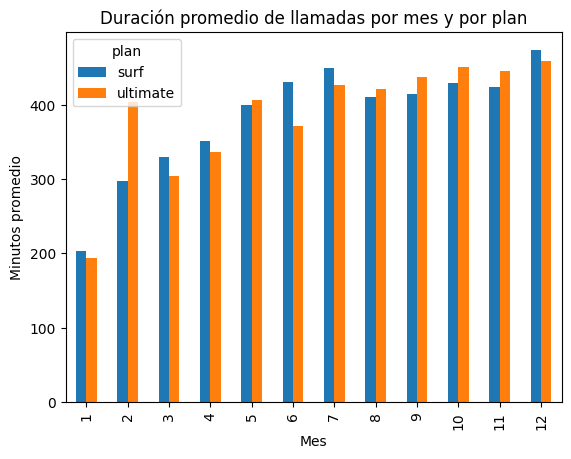

In [41]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_call_duration=mrg_data.pivot_table(index="month",columns="plan",values="minutes",aggfunc="mean")
avg_call_duration.plot(kind="bar",title="Duración promedio de llamadas por mes y por plan",xlabel="Mes",ylabel="Minutos promedio")
plt.show()

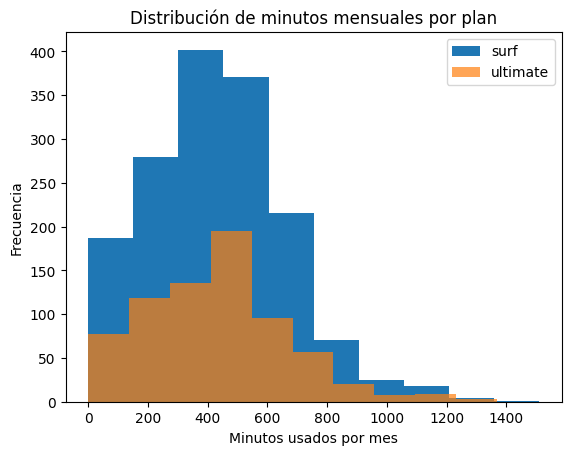

In [42]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
calls_duration_surf=mrg_data[mrg_data["plan"]=="surf"]["minutes"].reset_index(drop=True)
calls_duration_ultimate=mrg_data[mrg_data["plan"]=="ultimate"]["minutes"].reset_index(drop=True)

calls_duration_surf.plot(kind="hist")
calls_duration_ultimate.plot(kind="hist",alpha=0.7)
plt.legend(["surf","ultimate"])
plt.title("Distribución de minutos mensuales por plan")
plt.xlabel("Minutos usados por mes")
plt.ylabel("Frecuencia")
plt.show()

In [43]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print("Media de la duración mensual de llamadas del plan Surf:",calls_duration_surf.mean())
var_calls_surf=np.var(calls_duration_surf)
print("Varianza de la duración de llamadas del pland Surf:", var_calls_surf)
print()
print("Media de la duración mensual de llamadas del plan Ultimate:",calls_duration_ultimate.mean())
var_calls_ultimate=np.var(calls_duration_ultimate)
print("Varianza de la duración de llamadas del pland Ultimate:", var_calls_ultimate)
print()
print(calls_duration_surf.describe())
print()
print(calls_duration_ultimate.describe())

Media de la duración mensual de llamadas del plan Surf: 428.7495232040687
Varianza de la duración de llamadas del pland Surf: 54933.334591317485

Media de la duración mensual de llamadas del plan Ultimate: 430.45
Varianza de la duración de llamadas del pland Ultimate: 57764.12527777777

count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: minutes, dtype: float64

count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: minutes, dtype: float64


<Axes: xlabel='minutes'>

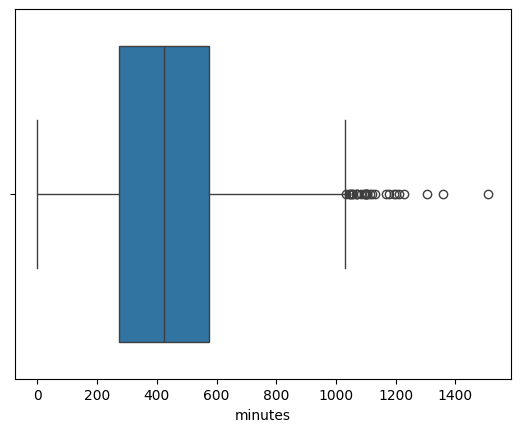

In [44]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(x=calls_duration_surf)


<Axes: xlabel='minutes'>

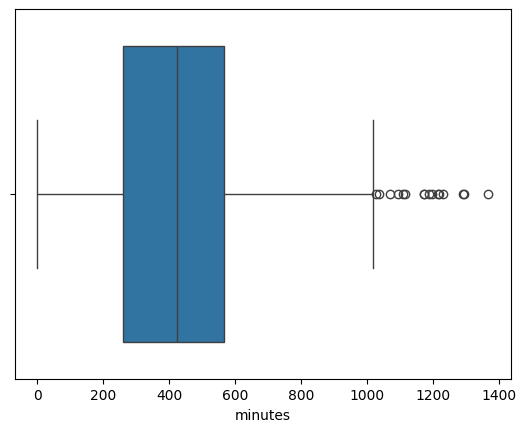

In [47]:
sns.boxplot(x=calls_duration_ultimate)

El histograma muestra que la distribución de la duración de las llamadas por mes por usuario son bastante similares para ambos planes, con una media de 436 minutos de duración para el plan Surf y una media de 434 minutos de duración de las llamadas para el plan Ultimate. Asimismo, se puede ver que, en ambos casos, los datos tienen una gran dispersión y el diagrama de caja muestra que las llamadas con una duración mayor a 900 minutos son consideradas valores atípicos. Entonces, se puede decir que el comportamiento de los usuarios en cuanto a la duración de las llamadas no varía en función del plan. 

### Mensajes

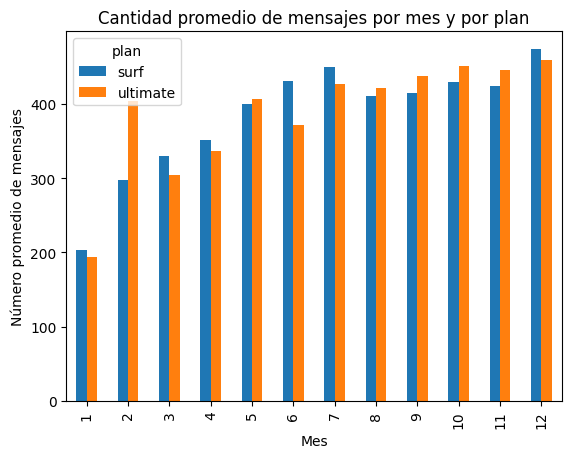

In [48]:
avg_number_messages=mrg_data.pivot_table(index="month",columns="plan",values="n_messages",aggfunc="mean")
avg_call_duration.plot(kind="bar",title="Cantidad promedio de mensajes por mes y por plan",xlabel="Mes",ylabel="Número promedio de mensajes")
plt.show()

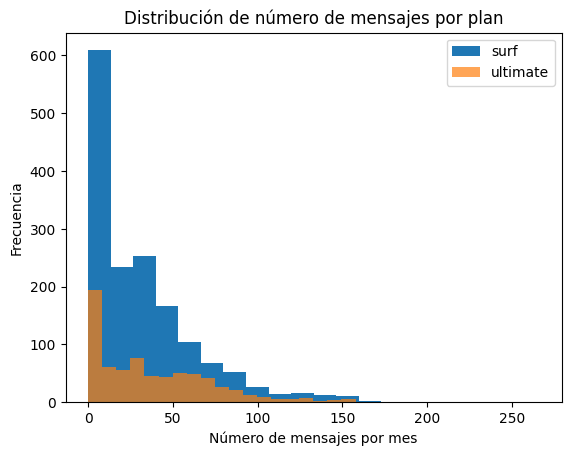

In [49]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
number_messages_surf=mrg_data[mrg_data["plan"]=="surf"]["n_messages"].reset_index(drop=True)
number_messages_ultimate=mrg_data[mrg_data["plan"]=="ultimate"]["n_messages"].reset_index(drop=True)

number_messages_surf.plot(kind="hist",bins=20)
number_messages_ultimate.plot(kind="hist",alpha=0.7,bins=20)
plt.legend(["surf","ultimate"])
plt.title("Distribución de número de mensajes por plan")
plt.xlabel("Número de mensajes por mes")
plt.ylabel("Frecuencia")
plt.show()


In [50]:
print(number_messages_surf.describe())
print()
var_messages_surf=np.var(number_messages_surf)
print("Varianza del número de mensajes del plan Surf:",var_messages_surf)
print()
print(number_messages_ultimate.describe())
print()
var_messages_ultimate=np.var(number_messages_ultimate)
print("Varianza del número de mensajes del plan Ultimate:",var_messages_ultimate)

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: n_messages, dtype: float64

Varianza del número de mensajes del plan Surf: 1126.0082317266622

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: n_messages, dtype: float64

Varianza del número de mensajes del plan Ultimate: 1207.0779147376543


<Axes: xlabel='n_messages', ylabel='plan'>

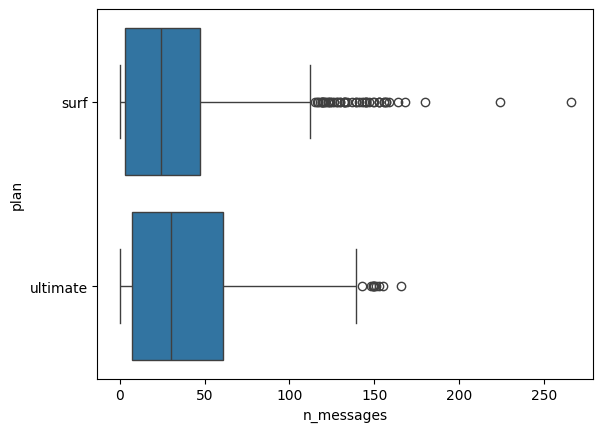

In [51]:
sns.boxplot(data=mrg_data,x="n_messages",y="plan",order=["surf","ultimate"])

El histograma y los diagramas de caja muestran que el comportamiento de los usuarios respecto a los mensajes es ligeramente diferente según el plan. Ya que el histograma demuestra que los datos tienen un sesgo a la derecha, se comparan las medianas y se puede observar que los usuarios del plan ultimate, con una mediana de 41, tienden a mandar más mensajes que los usuarios del plan surf, cuya mediana es 32. Además, mientras que para los usuarios del plan surf se considera que mandar más de 100 mensajes mensualmente es un valor atípico, para los usuarios del plan ultimate mandar más de 125 mensajes es un valor atípico.

### Internet

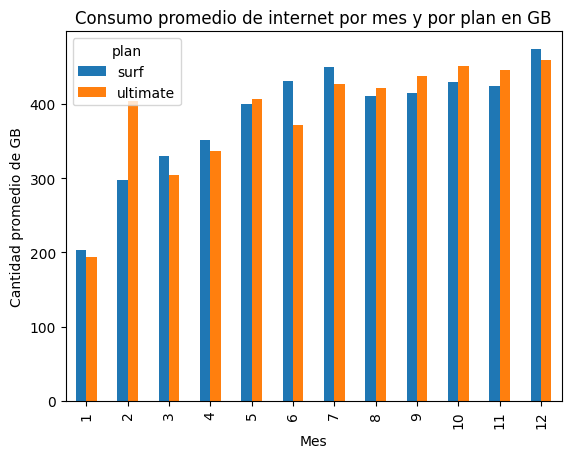

In [52]:
avg_internet_consumed=mrg_data.pivot_table(index="month",columns="plan",values="gb_used",aggfunc="mean")
avg_call_duration.plot(kind="bar",title="Consumo promedio de internet por mes y por plan en GB",xlabel="Mes",ylabel="Cantidad promedio de GB")
plt.show()

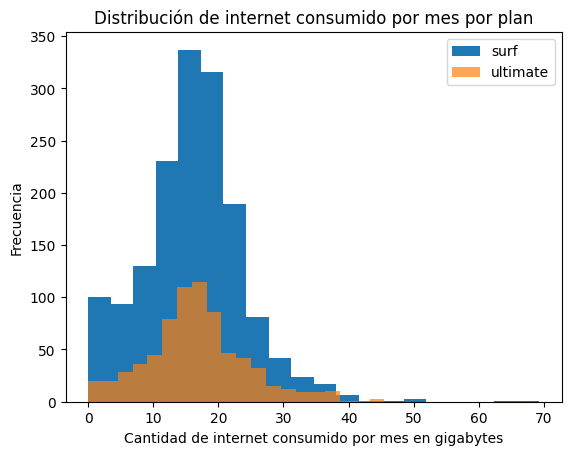

In [53]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
gb_used_surf=mrg_data[mrg_data["plan"]=="surf"]["gb_used"].reset_index(drop=True)
gb_used_ultimate=mrg_data[mrg_data["plan"]=="ultimate"]["gb_used"].reset_index(drop=True)

gb_used_surf.plot(kind="hist",bins=20)
gb_used_ultimate.plot(kind="hist",alpha=0.7,bins=20)
plt.legend(["surf","ultimate"])
plt.title("Distribución de internet consumido por mes por plan")
plt.xlabel("Cantidad de internet consumido por mes en gigabytes")
plt.ylabel("Frecuencia")
plt.show()

In [54]:
print(gb_used_surf.describe())
print()
var_internet_surf=np.var(gb_used_surf)
print("Varianza de la distribución del consumo de internet para el plan surf:", var_internet_surf)
print()
print(gb_used_ultimate.describe())
var_internet_ultimate=np.var(gb_used_ultimate)
print("Varianza de la distribución del consumo de internet para el plan ultimate:", var_internet_ultimate)

count    1573.000000
mean       16.170199
std         7.825697
min         0.000000
25%        11.705586
50%        16.434873
75%        20.507432
max        69.269131
Name: gb_used, dtype: float64

Varianza de la distribución del consumo de internet para el plan surf: 61.202594454778016

count    720.000000
mean      16.811230
std        7.667869
min        0.000000
25%       12.370073
50%       16.463223
75%       20.522000
max       45.503252
Name: gb_used, dtype: float64
Varianza de la distribución del consumo de internet para el plan ultimate: 58.71454728954916


<Axes: xlabel='gb_used', ylabel='plan'>

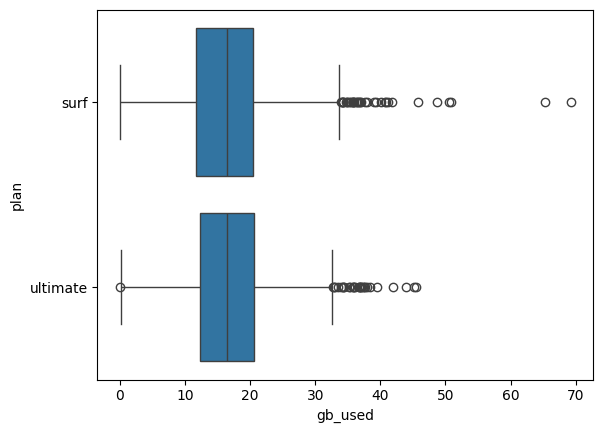

In [55]:
sns.boxplot(data=mrg_data,x="gb_used",y="plan",order=["surf","ultimate"])

El histograma y los diagramas de caja muestran que las distribuciones del consumo de internet por mes por usuario son bastante similares para ambos planes, con una media de 16,17 gb de internet para el plan Surf y una media de 16,81 gb de internet para el plan Ultimate. Además, se puede ver que la distribución del plan Surf tiene más valores atípicos que la del plan Ultimate. Con ello también se puede notar que los usuarios del plan Surf tienden a consumir más internet de lo que está incluido en su tarifa mensual, lo cual causaría que tengan que pagar cargos extra. 

## Ingreso

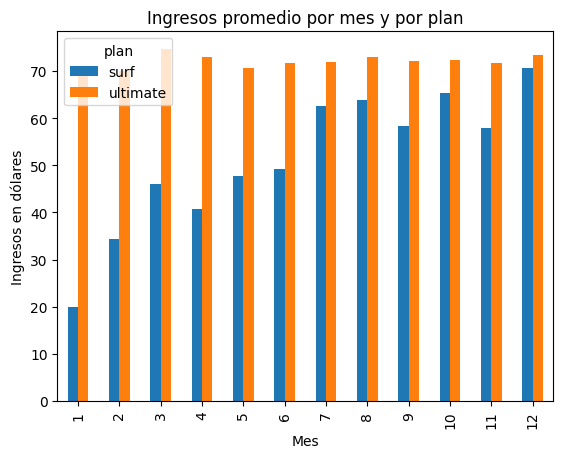

In [56]:
avg_income=mrg_data.pivot_table(index="month",columns="plan",values="total_pay",aggfunc="mean")
avg_income.plot(kind="bar",title="Ingresos promedio por mes y por plan",xlabel="Mes",ylabel="Ingresos en dólares")
plt.show()

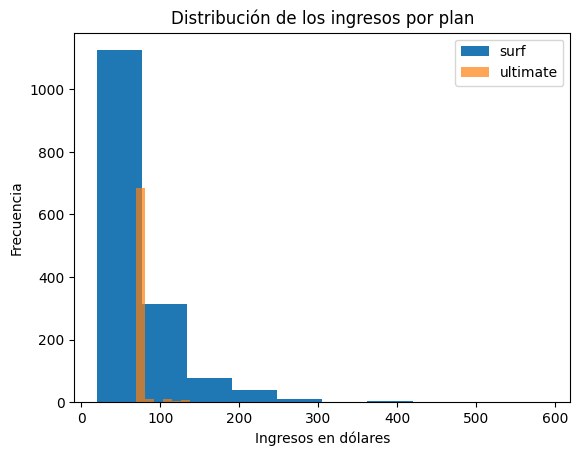

In [57]:
income_surf=mrg_data[mrg_data["plan"]=="surf"]["total_pay"].reset_index(drop=True)
income_ultimate=mrg_data[mrg_data["plan"]=="ultimate"]["total_pay"].reset_index(drop=True)

income_surf.plot(kind="hist",bins=10)
income_ultimate.plot(kind="hist",alpha=0.7,bins=10)
plt.legend(["surf","ultimate"])
plt.title("Distribución de los ingresos por plan")
plt.xlabel("Ingresos en dólares")
plt.ylabel("Frecuencia")
plt.show()

In [58]:
print(income_surf.describe())
print()
avg_income_surf=income_surf.mean()
print("Ingresos promedio del plan surf:",avg_income_surf)
var_income_surf=np.var(income_surf)
print("Varianza de la distribución del ingreso para el plan surf:", var_income_surf)
print()
print(income_ultimate.describe())
print()
avg_income_ultimate=income_ultimate.mean()
print("Ingresos promedio del plan ultimate:",avg_income_ultimate)
var_income_ultimate=np.var(income_ultimate)
print("Varianza de la distribución del ingreso para el plan ultimate:", var_income_ultimate)

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: total_pay, dtype: float64

Ingresos promedio del plan surf: 60.706408137317226
Varianza de la distribución del ingreso para el plan surf: 3065.8848438690247

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: total_pay, dtype: float64

Ingresos promedio del plan ultimate: 72.31388888888888
Varianza de la distribución del ingreso para el plan ultimate: 129.66814043209877


<Axes: xlabel='total_pay', ylabel='plan'>

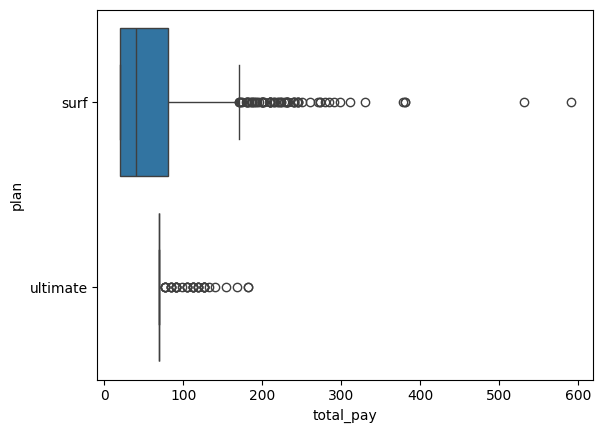

In [59]:
sns.boxplot(data=mrg_data,x="total_pay",y="plan",order=["surf","ultimate"])

El histograma y los diagramas de caja demuestran que los ingresos son diferentes según el plan de los usuarios. Por un lado, el plan Surf tiene un ingreso promedio de 60 dólares, una gran dispersión de datos y mayor cantidad de datos atípicos. Ello indica que los usuarios del plan Surf tienden a pagar más que la tarifa inicial del plan. En cambio, el ingreso promedio del plan Ultimate es de 72 dólares, la mayoría de los datos se concentran alrededor de dicho valor y no existen muchos valores atípicos, lo cual indicaría que rara vez los usuarios de Ultimate sobrepasan la tarifa del plan.

## Prueba de hipótesis estadísticas

H0= Los ingresos promedio de los usuarios de los planes Ultimate y Surf son iguales entre sí

H1= Los ingresos promedio de los usuarios de los planes Ultimate y Surf no son iguales entre sí

In [60]:
# Primero se realizará la prueba de Levene para evaluar la igualdad de varianzas de las muestras
alpha= 0.05
levene=st.levene(income_surf,income_ultimate)
print("valor p:",levene.pvalue)
if levene.pvalue<alpha:
    print("Rechazamos la hipótesis nula:las varianzas son diferentes")
else:
    print("No podemos rechazar la hipótesis nula: las varianzas son iguales")
print()  
results=st.ttest_ind(income_surf,income_ultimate,equal_var=False)
print("valor p:",results.pvalue)

if results.pvalue<alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 5.028876110654919e-83
Rechazamos la hipótesis nula:las varianzas son diferentes

valor p: 3.170390548113574e-15
Rechazamos la hipótesis nula


Con un nivel de significación de 0.05, los datos proporcionan evidencia suficiente para rechazar la hipótesis nula. Por lo tanto, se puede concluir que los ingresos promedio de los usuarios de los planes Surf y Ultimate difieren. 

H0= El ingreso promedio de los usuarios de NY-NJ es igual al de los usuarios de otras regiones

H1= El ingreso promedio de los usuarios de NY-NJ es diferente al de los usuarios de otras regiones

In [61]:
# Primero se filtrará el dataframe para calcular el ingreso promedio de los usuarios de NY-NJ y los que no viven en esa zona
income_ny_nj=mrg_data[mrg_data["city"]=="New York-Newark-Jersey City, NY-NJ-PA MSA"]["total_pay"].reset_index(drop=True)
income_ny_nj=income_ny_nj.dropna()
print(income_ny_nj.mean())
print(income_ny_nj)
income_not_ny_nj=mrg_data[mrg_data["city"]!="New York-Newark-Jersey City, NY-NJ-PA MSA"]["total_pay"].reset_index(drop=True)
income_not_ny_nj=income_not_ny_nj.dropna()
print(income_not_ny_nj)
print(income_not_ny_nj.mean())

59.921352785145885
0       20.00
1       38.84
2       20.00
3      100.00
4       20.00
        ...  
372     70.00
373    100.00
374     80.00
375     60.00
376    100.00
Name: total_pay, Length: 377, dtype: float64
0       70.00
1       20.00
2       20.00
3       90.09
4       60.00
        ...  
1911    70.00
1912    20.00
1913    70.00
1914    40.00
1915    90.00
Name: total_pay, Length: 1916, dtype: float64
65.2227713987474


In [63]:
# Primero se realizará la prueba de Levene para evaluar la igualdad de varianzas de las muestras
alpha= 0.05
levene=st.levene(income_ny_nj,income_not_ny_nj)
print("valor p:",levene.pvalue)
if levene.pvalue<alpha:
    print("Rechazamos la hipótesis nula:las varianzas son diferentes")
else:
    print("No podemos rechazar la hipótesis nula: las varianzas son iguales")
print()  
results=st.ttest_ind(income_ny_nj,income_not_ny_nj,equal_var=True)
print("valor p:",results.pvalue)
if results.pvalue<alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.12580091109612837
No podemos rechazar la hipótesis nula: las varianzas son iguales

valor p: 0.043557431621342436
Rechazamos la hipótesis nula


Con un nivel de significación de 0.05, los datos proporcionan evidencia suficiente para rechazar la hipótesis nula.Entonces, se puede conluir que el ingreso promedio de los usuarios del área de NY-NJ es diferente al de los usuarios de otras regiones.

## Conclusión general

El objetivo de este proyecto fue analizar el comportamiento de los clientes y determinar qué tarifa genera más ingresos. Para ello se siguieron los siguientes pasos:
1. Se importaron las librerías necesarias para el análisis y se cargaron los datos en dataframes distintos.

2. Se transformaron las columnas que contenían fechas al tipo datetime para después poder extraer los meses y obtener el recuento mensual de las llamadas, mensajes y sesiones de internet. Además, se redondeó la duración de las llamadas y se transformó el consumo de internet de mg a gb para que coincida con la forma en la que la empresa calcula las tarifas totales.

3. Se calculó la cantidad de llamadas, duración de las llamadas, cantidad de mensajes y tráfico de internet consumidos por cada usuario al mes. Luego de ello, se unieron los datos en un solo dataframe junto a la información de cada tarifa para determinar a qué plan pertenecía cada usuario y con dicha información calcular los ingresos de cada usuario al mes.

4. Posteriormente, se analizó el comportamiento de los usuarios en cuanto a la duración promedio de las llamadas, la cantidad de mensajes, el consumo de internet y los ingresos que generan según el plan. Para ello, se trazaron gráficos de barras, histogramas, diagramas de caja y se calcularon las medias y varianza de cada grupo. Finalmente, se establecieron las hipótesis nula y alternativa para probar que existían diferencias significativas entre los ingresos promedio de cada plan y estas se probaron usando la prueba de t de student.

Una vez realizado el análisis de datos se llegó a las siguientes conclusiones:
1. Dados los resultados de la prueba t de student y con una significancia de 0.05, se puede concluir que los ingresos promedio de los usuarios de los planes Surf y Ultimate difieren.

2. Asimismo, los usuarios del plan Surf generan un ingreso promedio de 60 dólares y, según el diagrama de caja, tienen mayor cantidad de valores atípicos que los usuarios del plan Ultimate, lo cual indica que tienden a sobrepasar el valor base de la tarifa. Entonces, se podría decir que el plan Surf es el que le genera más ingresos a la empresa.

3. Por su parte, el plan Ultimate generan un ingreso promedio de 72 dólares por usuario y los datos se concentran en su gran mayoría alrededor de ese valor, por lo que se concluye que difícilmente esos usuarios pagan cargos extra.

4. En cuanto al comportamiento de los usuarios, los datos estadísticos demuestran que los usuarios del plan Surf tienden a consumir más internet de lo que está incluido en su tarifa mensual, con un consumo promedio de 16717 mb de internet.

5. Respecto a la cantidad de mensajes enviados, se compararon las medianas de cada grupo de usuarios y se pudo concluir que los usuarios del plan Ultimate son quienes tienden a mandar más cantidad de mensajes. Sin embargo, ninguno de los dos grupos de usuarios tienden a superar la cantidad de mensajes incluida en sus tarifas.

6. Finalmente, respecto a la duración de las llamadas, los datos demostraron que las medias de ambos grupos de usuarios son bastante cercanas, por lo que su comportamiento no difiere en ese aspecto.
